# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Brian KYANJO

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

## 1.0. Initial Setup

In [1]:
import numpy as np # Numpy is needed for numerical operations like creating arrays and random numbers
import matplotlib.pyplot as plt # Matplotlib is needed to create plots

Nt = 200 # This is the number of time steps in our Random walk
Nx = 1000 # Number of Random walkers

mu_x = 1.5 # The average step size in our random walk
s_x = 2.1 # The standard deviation of the step size in our random walk
min_x = 1.25 # The minimum step size at each step in the random walk


## 1.1. Running the Model

In [2]:
# Container for all walkers at each time step.
X = np.zeros((Nt,Nx))

#time step loop
for i in np.arange(Nt):
    
    #distance loop
    for j in np.arange(Nx):
        
        #Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
        
        # Generating step sizes until the step size exceeds min_x.
        while x_i < min_x:
            
            #Calculate the random step size for the j^th walker at the i^th time step
            x_i = s_x*np.random.randn() + mu_x
            
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i   


### 1.2 Plot Results of a Multi-walker Random Walk

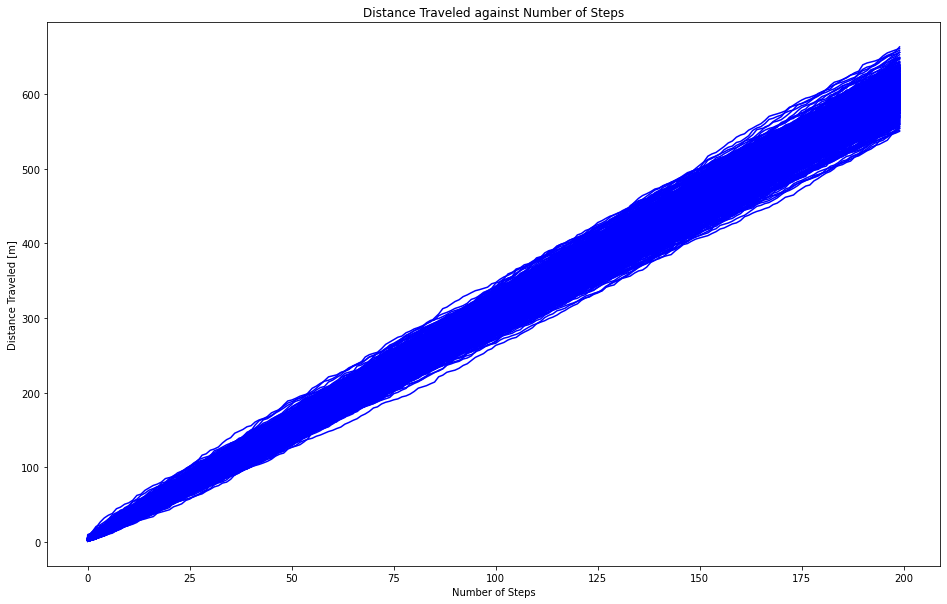

In [3]:
plt.figure(figsize=(16,10)) # Create a new figure and make it 16" wide by 10" tall

plt.plot(np.arange(Nt),X,'b-') # Plot the location of all walkers versus time as blue lines
plt.xlabel('Number of Steps') # Label the x-axis
plt.ylabel('Distance Traveled [m]') # Label the y-axis
plt.title('Distance Traveled against Number of Steps')
plt.show()

The distance moved increases with increase in number of steps, therefore distance covered depends on the number of steps made.

## 1.3. Reproduce the 2 figures in section 5.1 and 5.2

In [4]:
mean_X = np.mean(X,axis=1) # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1) # Calculate the standard deviation of all walkers through time

### 5.1 Plot 1

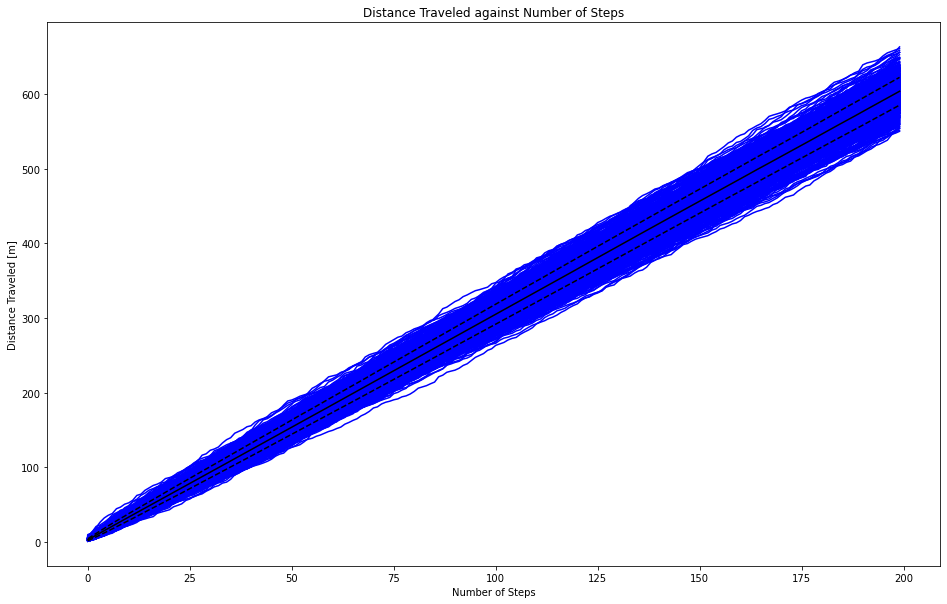

In [5]:
plt.figure(figsize=(16,10)) # Create a new figure and make it 16" x 10" 

plt.plot(np.arange(Nt),X,'b-') # plot the location of all walkers as a blue line
plt.plot(np.arange(Nt),mean_X,'k-') # plot mean as a black line
plt.plot(np.arange(Nt),mean_X + std_X, 'k--') # plot mean plus standard deviation as ablack dotted line
plt.plot(np.arange(Nt),mean_X - std_X, 'k--') # plot mean minus standard deviation as ablack dotted line
plt.xlabel('Number of Steps') # label the x-axis as Number of Steps
plt.ylabel('Distance Traveled [m]') # label the y-axis as Distance Traveled [m]
plt.title('Distance Traveled against Number of Steps')
plt.show()

The distance moved increases with increase in number of steps

### 5.1 Plot 2

Text(0, 0.5, 'Frequency [-]')

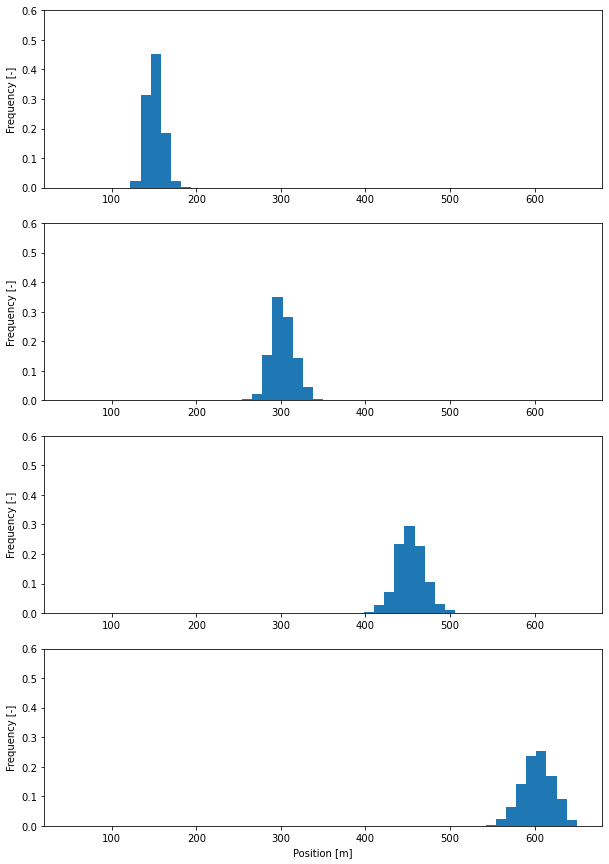

In [6]:
# be : bin_edges
# x_50 : value of the histogram
# synatax : hist, bin_edges = np.histogram(...)

#computes the histogram of a dataset.
'''
parameters:
-----------
X[49,:] : input array (at the 50th time step and all walkers)
bins=40 : forty equal width bins 
range=(-10.0,200) : the lower and upper range of the bins

retuns:
-------
x_50 : values of the histogram
be_50 : bin_edges
'''
x_50, be_50 = np.histogram(X[49,:], bins=50, range=(50,650)) 
x_100, be_100 = np.histogram(X[99,:], bins=50, range=(50,650))
x_100, be_100 = np.histogram(X[99,:], bins=50, range=(50,650))
x_150, be_150 = np.histogram(X[149,:], bins=50, range=(50,650))
x_200, be_200 = np.histogram(X[-1,:], bins=50, range=(50,650))



plt.figure(figsize=(10,15)) # Create a new figure and make it 10" x 15" 
plt.subplot(4,1,1) # Create a subplot that is 4 rows x 1 column and call the first plot
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) 
'''
plot of bars positioned at (be_50[1:]+be_50[:-1])/2
with dimensions given by height = (x_50/np.sum(x_50))
and width=(be_50[1]-be_50[0]).
'''

plt.ylim((0.0,0.6)) # limit the y-axis between 0 to 0.4
plt.ylabel('Frequency [-]') # label y-axis as Frequency [-]

plt.subplot(4,1,2) # Create a subplot that is 4 rows x 1 column and call the second plot
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.6)) # limit the y-axis between 0 to 0.4
plt.ylabel('Frequency [-]') # label y-axis as Frequency [-]

plt.subplot(4,1,3) # Create a subplot that is 4 rows x 1 column and call the third plot
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.6)) # limit the y-axis between 0 to 0.4
plt.ylabel('Frequency [-]') # label y-axis as Frequency [-]

plt.subplot(4,1,4) # Create a subplot that is 4 rows x 1 column and call the forth plot
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.6)) # limit the y-axis between 0 to 0.4
plt.xlabel('Position [m]') # label x-axis as Position [m] 
plt.ylabel('Frequency [-]') # label y-axis as Frequency [-]


The heights and width of the histograms depend on the bins and range selected, however as the time step of the walkers increases the histogram positions increases with decreasing frequency.

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [7]:
Nt = 300 # This is the number of steps (or time steps) in our Random Walk
Nx = 3  # Initialize the number of walkers.

mu_x = 0.5 # The average step size in our random walk in the x-direction
s_x = 1.5  # The standard deviation of the step size in our random walk in the x-direction
mu_y = 5.0 # The average step size in our random walk in the y-direction
s_y = 2.5  # The standard deviation of the step size in our random walk in the y-direction


In [8]:
# Container of all walkers at each time stepin in the x-direction .
X = np.zeros((Nt,Nx))

# Container of all walkers at each time stepin in the y-direction .
Y = np.zeros((Nt,Nx))

for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step in the x-direction.
        x_i = s_x*np.random.randn() + mu_x
        
        # Calculate the random step size for the j^th walker at the i^th time step in the y-direction.
        y_i = s_y*np.random.randn() + mu_y
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step in both x and y directions, the initial position was 0
            X[i,j] = 0.0 + x_i 
            Y[i,j] = 0.0 + y_i 
        else:
            # If at a subsequent time step in both x and y directions, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            Y[i,j] = Y[i-1,j] + y_i 
            

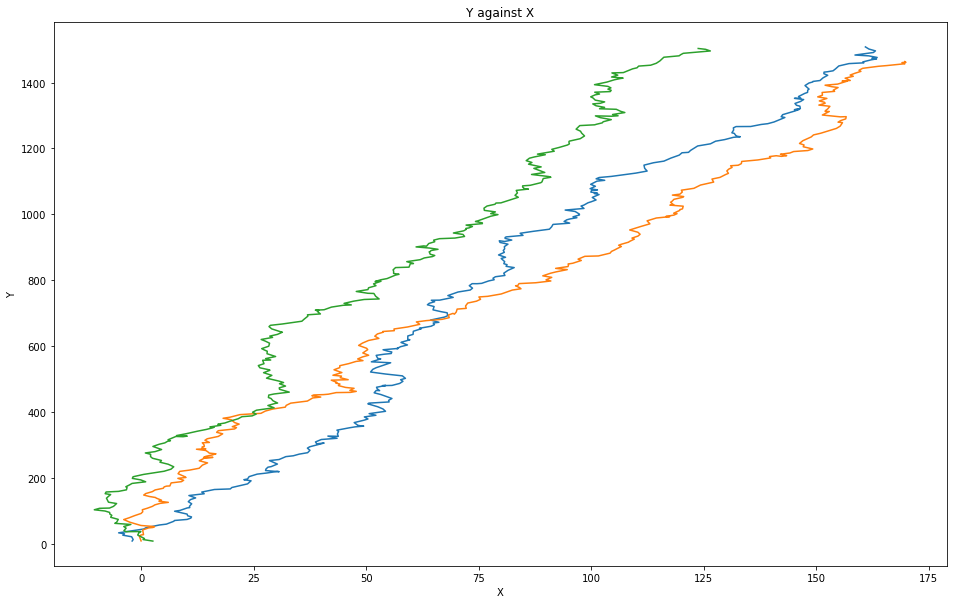

In [9]:
plt.figure(figsize=(16,10)) # Create a new figure and make it 16" x 10" 

plt.plot(X,Y) # plot the location of all walkers as a blue line
plt.xlabel('X') # label the x-axis as Number of Steps
plt.ylabel('Y') # label the y-axis as Distance Traveled [m]
plt.title('Y against X')
plt.show()

The figure above depicts the position of all three random walkers at each step of their respective random walks. The movements are increasing in both directions but are unpredictable, since the walks are random, hence our model simulated well the random movements. 